In [1]:
import numpy as np
import math
from sympy import *
import matplotlib
import matplotlib.pyplot as plt

# Golden-Section Search

## Input: 
1. Objective function
2. Boundary points
3. Number of iteration
4. Tolerance


## Compute:

1. Golden ratio
3. Stopping condition


## Visualisation:

Find the local minimum for the function

In [2]:
# Objective function: f(x)
#define variables and formula
x = symbols('x')
f =  abs(sin(2*pi*x)-10*(2*x-1))
#Value of function
f_val = lambdify([x],f)

# Golden-Section Search
1. Function f
2. a and b are boundary points
3. tol = tolerance 
4. Iter = max no. of iterations

In [8]:
gr = (math.sqrt(5) + 1) / 2

def golden_ss(f, a, b, tol, Iter):
    
    #Candidate boundary points
    c = b - (b - a) / gr
    d = a + (b - a) / gr
    
    k = 0
    #store history iterations
    a_history = a
    b_history = b
    while abs(b - a) > tol and k < Iter:
        #update boundary points
        if f(c) < f(d):  
            b = d
        else:
            a = c
        #update candidate
        c = b - (b - a) / gr
        d = a + (b - a) / gr
        k += 1
        
        #store the history iterations
        a_history = np.vstack((a_history,a))
        b_history = np.vstack((b_history,b))
    return a_history,b_history

In [4]:
#run algorithm
a_init = 0
b_init = 1
a_History,b_History = golden_ss(f_val,a_init,b_init,1.0e-3,10)
N = len(a_History)

# Visualisation

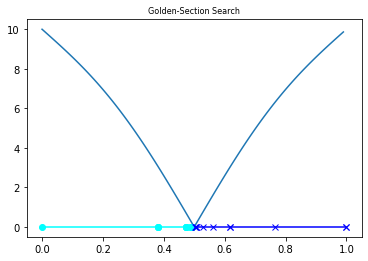

In [5]:
#from pylab import figure, cm
r_min, r_max = a_init, b_init 
Range = np.arange(r_min, r_max, 0.01)
value = f_val(Range)
plt.plot(Range, value)
plt.title("Golden-Section Search" , fontsize=8)
plt.plot(a_History,np.zeros(N),marker='o',c='cyan') 
plt.plot(b_History,np.zeros(N),marker='x',c='blue') 
plt.show()